The below function imports matplotlib pyplot scipy and numpy

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

The below function reads the text and establishes arrays to remove all text from the document. While numpy can import the text, the below function can be adapted for additional text and wording that can be adding the document

In [2]:
#import and read lines of text
dataset = "ASTR19_S22_group_project_data.txt"
infile = open(dataset, 'r+')
lines = infile.readlines()
#set blank arrays
days = np.array(['        '])
time = np.array(['        '])
height = np.array(['       '])
#for loop strips and splits apart the document
for line in lines:
    sline = line.strip().split()
    #print(sline) 
    days = np.append(days, sline[0])
    time = np.append(time, sline[1])
    height = np.append(height, sline[2])
#file is closed
infile.close()
#

days = days[4:]
time = time[4:]
height = height[4:]
#print(days)
#print(time)
#print(height)


the below function creates float arrays of days and heights. It also converts the hours and minutes into  into decimals

In [3]:
fDays = days.astype(float)
#print(fDays)
fHeight = height.astype(float)
#print(fHeight)
fHours = np.array([])
for i in time:
    splitTime = i.split(':')
    hoursMinutes = float(splitTime[0]) + (float(splitTime[1])/60.0)
    hoursMinutes = hoursMinutes/24
    fHours = np.append(fHours, hoursMinutes)
    #print(splitTime)
    
#print(fHours)
#print(hoursMinutes)

the below code adds the decimal time to each recorded day

In [4]:
dayMinutes = np.array([0.0])
for i in range(82):
    dayTime = fDays[i]+fHours[i]
    dayMinutes = np.append(dayMinutes, dayTime)

dayMinutes = dayMinutes[1:]

the below function creates a mean of record low and high tides

In [29]:

highTides = np.array([0.0])
lowTides = np.array([0.0])
highCounter = 0
lowCounter = 1
while highCounter < 82:
    highTides = np.append(highTides, fHeight[highCounter])
    highCounter = highCounter + 2
    
#print(highTides)
while lowCounter < 82:
    lowTides = np.append(lowTides, fHeight[lowCounter])
    lowCounter = lowCounter + 2

highTides = highTides[1:]
lowTides = lowTides[1:]
lowMean = np.mean(lowTides)
highMean = np.mean(highTides)



the below function defines an oscillaotry function using 2 sin waves with high and low means as variables against time. The curve is then fit against a set of trial and error values.  the vertical shift is the mean overall height

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


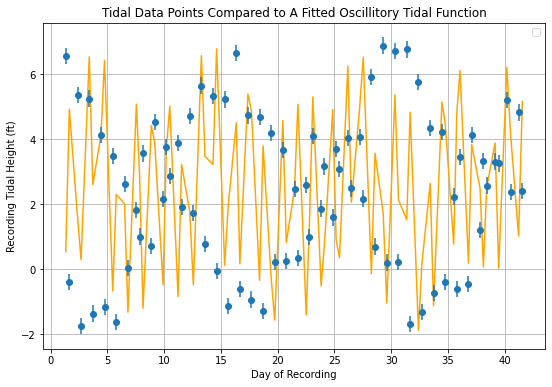

In [31]:
x = dayMinutes
sigma = 0.25

#plt.plot(dayMinutes, fHeight,'o')

heightMean = np.mean(fHeight)
pNaught = [3.4,2.5,-0.5, heightMean]

def sinX(x, a, b, c, d):
    return (a * (np.sin((highMean * x) + c))) + np.sin((lowMean*x)) + d


param, param_cov = optimize.curve_fit(sinX, x, fHeight, p0 = pNaught)

fit = sinX(dayMinutes, *pNaught)
#plt.plot(dayMinutes, fit)

plt.figure(figsize=(9, 6))
plt.plot(dayMinutes, fit, color='orange')
plt.errorbar(dayMinutes, fHeight, sigma,fmt='o')
plt.xlabel('Day of Recording')
plt.ylabel('Recording Tidal Height (ft)')

plt.title('Tidal Data Points Compared to A Fitted Oscillitory Tidal Function')
plt.legend()
plt.grid(True)
plt.savefig('plotted function.pdf',bbox_inches='tight')
plt.show()

the below function creates a histogram of residuals from our fitted graph

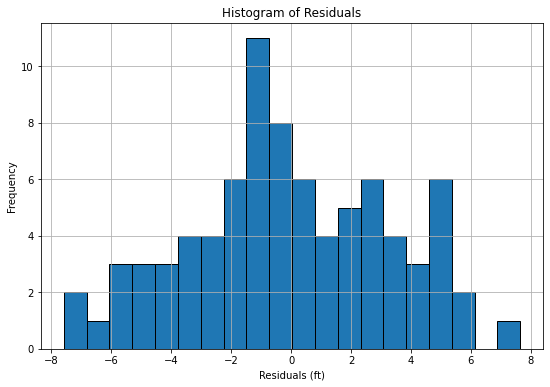

3.368244209646843

In [32]:
#residuals
residuals =fHeight-fit

# Plot
plt.figure(figsize=(9, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.savefig('histogram.pdf',bbox_inches='tight')
plt.show()

std_dev = np.std(residuals)
std_dev

The below function calculates outliers and the standard deviations away from the mean

In [33]:
outlier = fHeight[26]+2
print(outlier)
fit_std = np.std(fit)
mean_fit = np.mean(fit)
d_mean=np.mean(fHeight)
d_std = np.std(fHeight)
diffs = (outlier-d_mean)/d_std
h = (outlier-mean_fit)/fit_std
print(f"The outlier is approx. {h} deviations away from the mean of the model. It is also {diffs} standard deviations away from the mean of the data.")

7.33
The outlier is approx. 1.9550211189537523 deviations away from the mean of the model. It is also 2.037983749407934 standard deviations away from the mean of the data.


the below function plots a histogram of the data and a dashed line for when i tsunami strikes

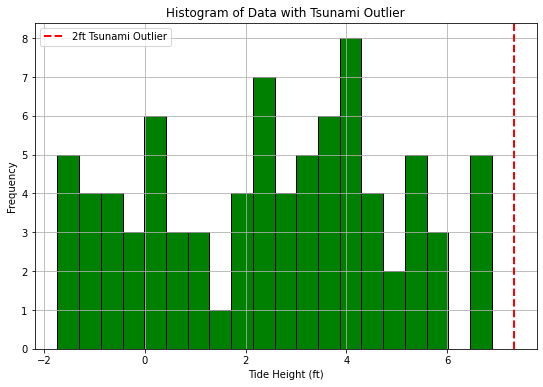

In [34]:
plt.figure(figsize=(9, 6))
plt.hist(fHeight, bins=20, edgecolor='black', color='green')
plt.axvline(x=outlier, color='red', linestyle='dashed', linewidth=2, label='2ft Tsunami Outlier')
plt.xlabel('Tide Height (ft)')
plt.ylabel('Frequency')

plt.title('Histogram of Data with Tsunami Outlier')
plt.legend()
plt.grid(True)
plt.savefig('histogram_outlier.pdf',bbox_inches='tight')
plt.show()